In [15]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
from fastai.basics import *

plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max,100)[:, None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

In [ ]:
We would use a quadratic equation to explain how gradient descent works

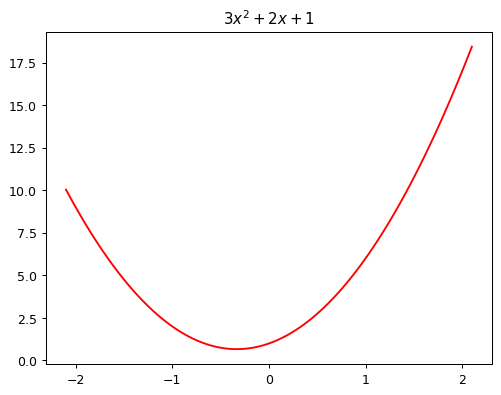

In [8]:
def f(x): return 3*x**2 + 2*x + 1

plot_function(f, "$3x^2 + 2x + 1$")

Recall: Quadratic equatioins take a form of $ax^2 + bx + c$, with parameters $a = 3, b = 2, c=1$. 

In [12]:
def quad(a,b,c,x): return a*x**2 + b*x + c

In [13]:
def mk_quad(a,b,c): return partial(quad, a,b,c)

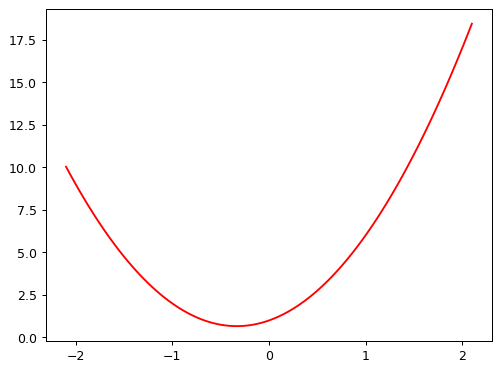

In [14]:
f2 = mk_quad(3,2,1)
plot_function(f2)

We'll proceed to add some noise measurements of our quadratic f. We'll then use gradient descent to see if we can recreate the orginal function

In [16]:
def noise(x, scale): return np.random.normal(scale=scale, size=x.shape)
def add_noise(x,mult, add): return x * (1+noise(x,mult)) + noise(x,add)

In [17]:
np.random.seed(42)

x = torch.linspace(-2,2, steps=20)[:,None]
y = add_noise(f(x), 0.15, 0.15)

Here's the first few values of each x and y

In [18]:
x[:5], y[:5]

(tensor([[-2.0000],
         [-1.7895],
         [-1.5789],
         [-1.3684],
         [-1.1579]]),
 tensor([[9.8904],
         [6.8481],
         [5.8484],
         [4.5538],
         [2.5297]], dtype=torch.float64))

This are tensors which are like arrays from numpy which we plot below

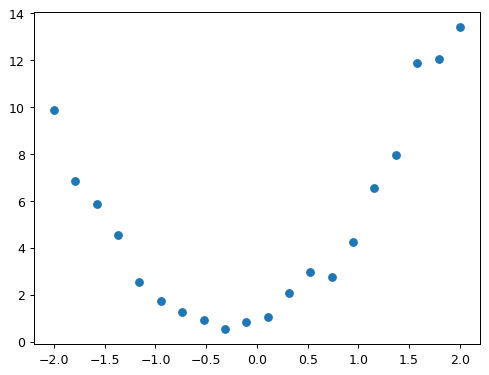

In [20]:
plt.scatter(x,y)

We would proceed to use sliders to change values of a,b, and c of our
quadratic equation

In [24]:
@interact(a=1.1, b=1.1, c=1.1)
def plot_quad(a,b,c):
    plt.scatter(x,y)
    plot_function(mk_quad(a,b,c), ylim=(-3,13))